In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [65]:
train = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210916_アヤメの分類/train.tsv", sep="\t") 
test = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210916_アヤメの分類/test.tsv", sep="\t") 
sample_submit = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210916_アヤメの分類/sample_submit.csv", header=None) 

In [71]:
train.head()

,id,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,0,5.3,3.7,1.5,0.2,Iris-setosa
1,1,6.8,2.8,4.8,1.4,Iris-versicolor
2,3,6.1,3.0,4.9,1.8,Iris-virginica
3,4,6.4,3.2,5.3,2.3,Iris-virginica
4,5,6.3,3.3,4.7,1.6,Iris-versicolor


In [72]:
trainX = train.iloc[:, 1:5]
testX = test.iloc[:, 1:5]

y= train["class"].replace({"Iris-virginica":0, "Iris-setosa":1, "Iris-versicolor": 2})

In [73]:
#基本ライブラリ
#import numpy as np
#import matplotlib.pyplot as plt

#機械学習関連のライブラリ
#from sklearn import datasets
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split

#深層学習関連のライブラリ
#from keras.utils import np_utils
#from keras.models import Sequential
#from keras.layers import Dense, Activation

In [74]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(trainX)  # パラメータの計算
x = scaler.transform(trainX)  # データの変換
print(x[:10])

t = np_utils.to_categorical(y)  # ラベルをone-hot表現に変換
print(t[:10])

[[-0.71455192  1.36783928 -1.27410172 -1.30384048]
 [ 1.00679907 -0.67484106  0.51964217  0.2300895 ]
 [ 0.20350194 -0.2209121   0.57399805  0.74139949]
 [ 0.54777214  0.23301687  0.79142155  1.38053698]
 [ 0.43301541  0.45998135  0.4652863   0.48574449]
 [ 0.20350194 -0.67484106  0.08479517  0.102262  ]
 [ 0.20350194 -0.44787658  0.4652863   0.2300895 ]
 [ 1.58058273 -0.44787658  1.3349803   0.74139949]
 [ 0.54777214 -0.67484106  0.95448918  1.12488198]
 [ 1.465826    0.23301687  1.17191268  0.74139949]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

(56, 4)
(19, 4)


In [100]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力層のニューロン数は4、中間層のニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
#model.add(Dropout(0.25)) 
model.add(Dense(3)) # 3つに分類するので、出力層のニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_44 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_45 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_46 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
___________________________________________________

In [105]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8, validation_data=(x_test, t_test))

Epoch 1/30
7/7 [==============================] - 0s 12ms/step - loss: 0.4328 - accuracy: 0.8214 - val_loss: 0.1926 - val_accuracy: 1.0000
Epoch 2/30
7/7 [==============================] - 0s 7ms/step - loss: 0.4251 - accuracy: 0.8393 - val_loss: 0.1875 - val_accuracy: 1.0000
Epoch 3/30
7/7 [==============================] - 0s 6ms/step - loss: 0.4194 - accuracy: 0.8393 - val_loss: 0.1829 - val_accuracy: 1.0000
Epoch 4/30
7/7 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.8571 - val_loss: 0.1783 - val_accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 0s 7ms/step - loss: 0.4065 - accuracy: 0.8571 - val_loss: 0.1740 - val_accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 0s 6ms/step - loss: 0.4012 - accuracy: 0.8571 - val_loss: 0.1700 - val_accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 0s 9ms/step - loss: 0.3958 - accuracy: 0.8571 - val_loss: 0.1661 - val_accuracy: 1.0000
Epoch 8/30
7/7 [=================

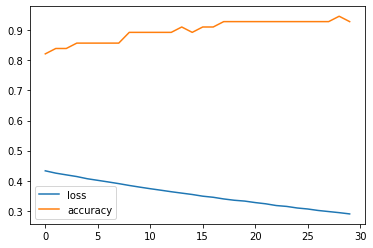

In [106]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

In [81]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

1/1 [==============================] - 0s 18ms/step - loss: 0.2361 - accuracy: 1.0000
0.23609136044979095 1.0


In [ ]:
#from keras.models import load_model

#model.save('model.h5')
#load_model('model.h5')

# in the case of Adams

In [108]:
model2 = Sequential()
model2.add(Dense(32, input_dim=4))
model2.add(Activation("relu"))
model2.add(Dense(32))
model2.add(Activation("relu"))
model2.add(Dense(3))
model2.add(Activation("softmax"))
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print(model2.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_50 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_51 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_52 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
___________________________________________________

In [109]:
history2 = model2.fit(x_train, t_train, epochs=30, batch_size=4, validation_data=(x_test, t_test))

Epoch 1/30
14/14 [==============================] - 1s 19ms/step - loss: 1.0959 - accuracy: 0.4107 - val_loss: 1.0098 - val_accuracy: 0.5263
Epoch 2/30
14/14 [==============================] - 0s 5ms/step - loss: 0.9780 - accuracy: 0.5714 - val_loss: 0.8698 - val_accuracy: 0.7895
Epoch 3/30
14/14 [==============================] - 0s 5ms/step - loss: 0.8816 - accuracy: 0.6429 - val_loss: 0.7470 - val_accuracy: 0.7895
Epoch 4/30
14/14 [==============================] - 0s 5ms/step - loss: 0.7974 - accuracy: 0.6786 - val_loss: 0.6317 - val_accuracy: 0.8421
Epoch 5/30
14/14 [==============================] - 0s 6ms/step - loss: 0.7178 - accuracy: 0.6786 - val_loss: 0.5141 - val_accuracy: 0.8421
Epoch 6/30
14/14 [==============================] - 0s 5ms/step - loss: 0.6427 - accuracy: 0.6786 - val_loss: 0.4242 - val_accuracy: 0.8421
Epoch 7/30
14/14 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.6964 - val_loss: 0.3408 - val_accuracy: 0.9474
Epoch 8/30
14/14 [=

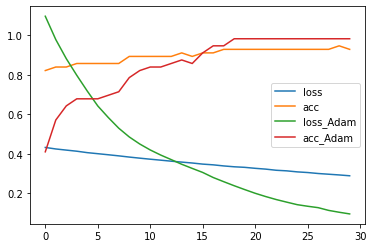

In [110]:
hist_loss2 = history2.history["loss"]
hist_acc2 = history2.history["accuracy"]


plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.plot(np.arange(len(hist_loss2)), hist_loss2, label='loss_Adam')
plt.plot(np.arange(len(hist_acc2)), hist_acc2, label='acc_Adam')
plt.legend()
plt.show()

In [111]:
pred = model2.predict(testX)

In [112]:
pred_cat = np.argmax(pred, axis=1)
pred_cat =pd.DataFrame(pred_cat)
pred_cat = pred_cat.replace([0, 1, 2], ["Iris-virginica", "Iris-setosa", "Iris-versicolor"])

In [113]:
sample_submit[1] = pred_cat
sample_submit.head()

,0,1
0,2,Iris-virginica
1,7,Iris-virginica
2,8,Iris-virginica
3,10,Iris-virginica
4,13,Iris-versicolor


In [114]:
sample_submit.to_csv("submit02.csv", index=None, header=None)